**Course:** SMM  
**Assignment:** 3

## Team Members
- **Muhammad Rehan** - 02-205252-012  
- **Arzoo Ghani Khan** - 02-205252-003

## Question 2

### Dataset
Raw dataset from: [Kaggle — hajramohsin/pakistan-air-quality-pollutant-concentrations](https://www.kaggle.com/hajramohsin/pakistan-air-quality-pollutant-concentrations)

In [15]:
# Load cleaned dataset
import pandas as pd

df = pd.read_csv('cleaned_data.csv')

df.head()

,date,city,pm2_5,pm10,no2,temp,humidity
0,2021-08-24,Islamabad,66.96,87.07,27.76,29.7,55
1,2021-08-24,Islamabad,64.50,82.37,24.33,29.4,56
2,2021-08-24,Islamabad,64.21,80.38,39.41,28.9,58
3,2021-08-24,Islamabad,64.75,79.55,51.41,28.4,60
4,2021-08-24,Islamabad,59.86,71.18,27.08,28.1,62


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84735 entries, 0 to 84734
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      84735 non-null  object 
 1   city      84735 non-null  object 
 2   pm2_5     84735 non-null  float64
 3   pm10      84735 non-null  float64
 4   no2       84735 non-null  float64
 5   temp      84735 non-null  float64
 6   humidity  84735 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 4.5+ MB


In [17]:
df.describe()

,pm2_5,pm10,no2,temp,humidity
count,84735.000000,84735.000000,84735.000000,84735.000000,84735.000000
mean,134.256753,178.642318,55.410441,24.547631,60.964218
std,159.014898,182.374891,58.064566,7.821365,22.296581
min,2.210000,3.810000,0.510000,0.000000,4.000000
25%,34.570000,64.660000,12.510000,19.300000,44.000000
50%,76.470000,115.090000,35.640000,26.400000,64.000000
75%,167.860000,222.385000,80.200000,30.100000,79.000000
max,1965.050000,2183.340000,833.510000,46.200000,100.000000


In [18]:
import matplotlib.pyplot as plt
import math

## Task 1: Compute the average and standard deviation of PM2.5 and PM10 across all cities.

In [19]:
unique_cities = df['city'].unique()
unique_cities

array(['Islamabad', 'Karachi', 'Lahore'], dtype=object)

In [20]:
# Calculate mean and standard deviation of PM 2.5 for each city
print(f"PM 2.5 Statistics by City:")
for city in unique_cities:
    print(f"\n{city}")
    city_data = df[df['city'] == city]
    mean = city_data['pm2_5'].mean()
    sd = city_data['pm2_5'].std()
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {sd}")

PM 2.5 Statistics by City:

Islamabad
Mean: 122.58211683483803
Standard Deviation: 117.36781075421354

Karachi
Mean: 81.54727472449595
Standard Deviation: 124.29483918278099

Lahore
Mean: 198.54145707311898
Standard Deviation: 198.91101333985017


In [21]:
# Calculate mean and standard deviation of PM 10 for each city
print(f"PM 10 Statistics by City:")
for city in unique_cities:
    print(f"\n{city}")
    city_data = df[df['city'] == city]
    mean = city_data['pm10'].mean()
    sd = city_data['pm10'].std()
    print(f"Mean: {mean}")
    print(f"Standard Deviation: {sd}")

PM 10 Statistics by City:

Islamabad
Mean: 147.66177482740306
Standard Deviation: 134.58614865920111

Karachi
Mean: 145.18942135289325
Standard Deviation: 153.41114479646598

Lahore
Mean: 242.9926523753935
Standard Deviation: 227.7915925109833


_______________________

## Task 2: Identify which city shows the highest variability in pollution levels.

In [22]:
# Observe variability in pollution levels across cities
city_variability = df.groupby("city")[["pm2_5", "pm10", "no2", "temp", "humidity"]].var()

print(city_variability)

# Identify city with highest variability (combined)
highest_variability_city = city_variability.mean(axis=1).idxmax()
print("\nCity with highest pollution variability:", highest_variability_city)


                  pm2_5          pm10          no2       temp    humidity
city                                                                     
Islamabad  13775.203001  18113.431411  3844.511664  73.737362  494.539729
Karachi    15449.207047  23534.979348  2676.035788  23.037621  430.584636
Lahore     39565.591228  51889.009619  2693.508827  74.371216  503.004627

City with highest pollution variability: Lahore


_______________________

## Task 3: Determine whether the data is skewed using mean vs. median comparisons.

In [23]:
# Skewness check (mean vs median)
overall_mean = df[['pm2_5','pm10']].mean()
overall_median = df[['pm2_5','pm10']].median()
print("\nMean vs Median (overall):")
print(pd.DataFrame({'Mean': overall_mean, 'Median': overall_median}))

print("\nMean vs Median (by city):")
city_stats = df.groupby('city')[['pm2_5','pm10']].agg(['mean','median'])
city_stats.columns = ['_'.join(col) for col in city_stats.columns]
print(city_stats)


Mean vs Median (overall):
             Mean  Median
pm2_5  134.256753   76.47
pm10   178.642318  115.09

Mean vs Median (by city):
           pm2_5_mean  pm2_5_median   pm10_mean  pm10_median
city                                                        
Islamabad  122.582117         81.95  147.661775       103.43
Karachi     81.547275         36.26  145.189421        98.29
Lahore     198.541457        121.51  242.992652       159.41


Answer: The data is right-skewed as the mean values for both PM2.5 and PM10 are higher than their respective median values across all cities.

As Lahore shows the highest variability in pollution levels, it is likely that Lahore is highly polluted.

_______________________

## Task 4: Use mode to find the most common temperature range.

In [24]:
# Most common temperature range
min_t = math.floor(df['temp'].min())
max_t = math.ceil(df['temp'].max())

# Using bins of size 5
bins = list(range(min_t-1, max_t+6, 5))
df['temp_range'] = pd.cut(df['temp'], bins=bins)
print("\nMost common temperature range:", df['temp_range'].mode().iloc[0])


Most common temperature range: (24, 29]


_______________________

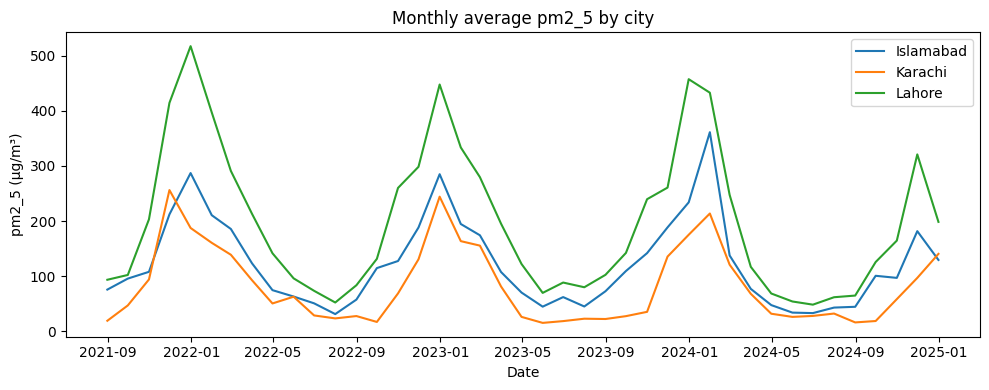

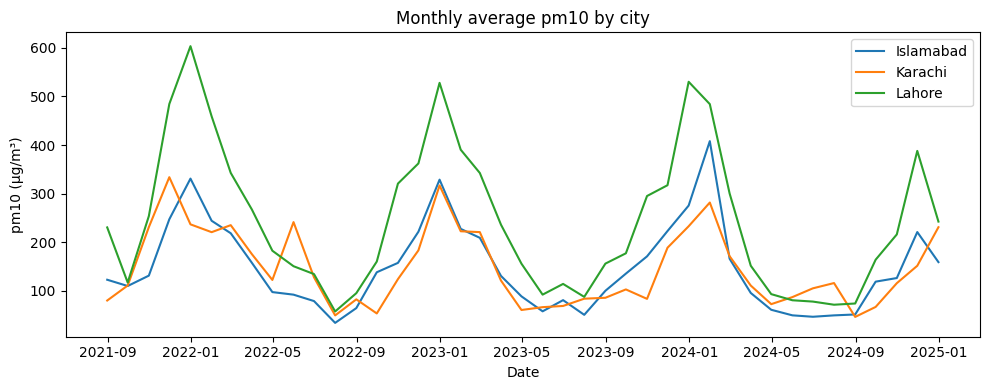

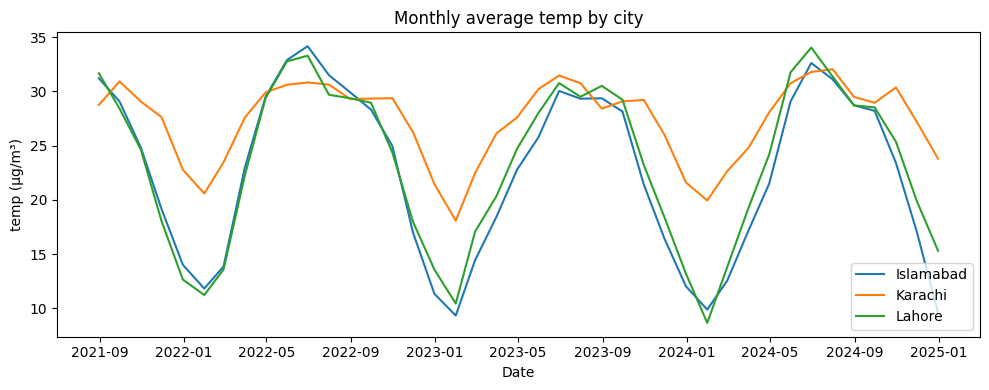

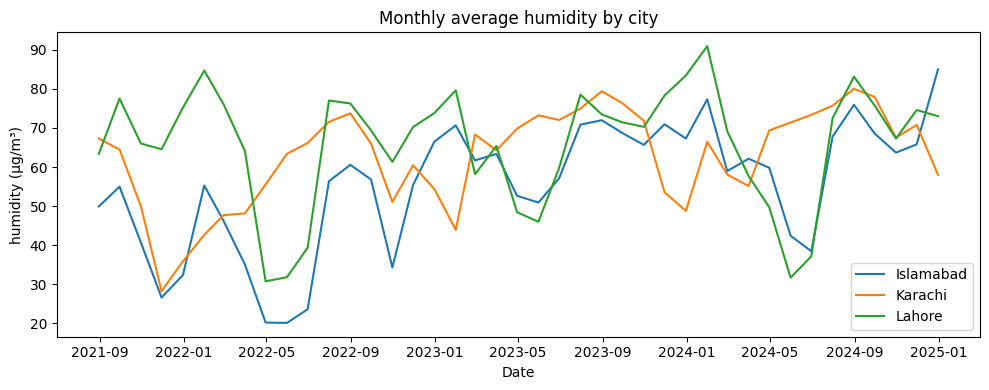

In [25]:
# Monthly averages per city (time series)
df["date"] = pd.to_datetime(df["date"])

monthly = (
    df.set_index("date")
    .groupby("city")
    .resample("ME")[["pm2_5", "pm10", "temp", "humidity"]]
    .mean()
    .reset_index()
)
cities = sorted(df["city"].unique())

for pollutant in ["pm2_5", "pm10", "temp", "humidity"]:
    plt.figure(figsize=(10, 4))
    for city in cities:
        s = monthly[monthly["city"] == city]
        plt.plot(s["date"], s[pollutant], label=city)
    plt.title(f"Monthly average {pollutant} by city")
    plt.xlabel("Date")
    plt.ylabel(f"{pollutant} (µg/m³)")
    plt.legend()
    plt.tight_layout()
    plt.show()

Answer: Since the PM2.5 and PM10 levels in Lahore are significantly higher than in other cities, it indicates that Lahore is the most polluted city among the ones analyzed.

Immediate actions should be taken to address air quality issues in Lahore, including stricter emissions regulations, promoting public transportation, and increasing green spaces to help mitigate pollution levels.

_____________________